In [1]:
#MCAR (missing completely at Random) tamamen bağımsız bir anket yapıyosun mesela
#adam yaşını girmeyi unutmuş atıyorum bunlar sonucu etkilemez dolayısıyla

#MAR(Missing at Random) tamamen rastgele değil. mesela diyetle ilgili bir anket 
#yapıyosun erkekler utanıyor ve bazıları kilosunu girmiyor kadınlarsa giriyo bu
#MCAR'a göre daha az rastgele bir durum. yani erkek olup olmamasıyla kilonun
#var olup olmaması bağlantılı

#MNAR(Missing not at Random) bu tamamen bağlı mesela gelir anketi yapıyosun ve
#geliri yüksek olan kişiler gelirini girmiyor mesela %90'ı
#bu herkesin gelirini ortalama, birbirine yakın 
# gösterebilir bu da istatistiksel olarak yanlış sonuçlar doğurur

In [2]:
#Removing Missing Values => eksik datalar çok az ise 5%' den daha az ise

#Imputation => Boş olan verileri doldurmak, ortalamasını medianını vs koymak 
#ya da makine öğrenmesiyle veriyi tahmin edip doldurmak

#Adding Missing Indicators => yeni bir kolon açıp eksikse true ,false koy gibi

#Using Domain Knowledge => MNAR var ve konuya hakimiz belli ki yüksek geliri 
#olanlar söylemeyecek belki ona göre bir eşik uydurabilirz yani bu alana hakimiz
#ve biliyoruz ortalamanın iştw 2 kat ve üzeri kazanalar söylemiyor tahminli bir
#şekilde doldurabiliriz. Ama burda konuya haki olmamız gerek

In [3]:
import seaborn as sns
import pandas as pd

In [4]:
df=sns.load_dataset("titanic")

In [5]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [7]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
df["deck"].unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [12]:
df.shape

(891, 15)

In [13]:
df.dropna().shape

(182, 15)

In [14]:
#imputation

In [15]:
#mean imputation => ortalamasını vs. alabiliriz demiştik age için deneyelim

<Axes: xlabel='age', ylabel='Count'>

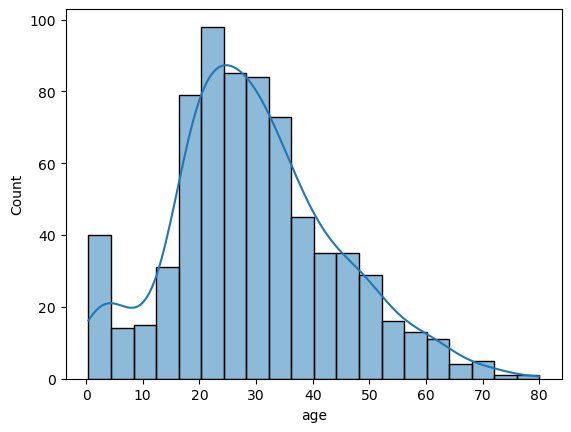

In [19]:
sns.histplot(data=df["age"], kde=True)

In [21]:
df["Age_Mean"]=df["age"].fillna(df["age"].mean()) 
#fillna => içine hangi değerleri koyacağımız

In [24]:
df[["Age_Mean","age"]] #888. satır örnek,
#

,Age_Mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


<Axes: >

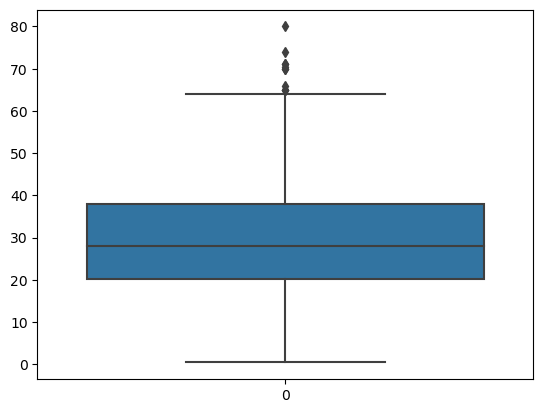

In [25]:
sns.boxplot(data=df["age"])

In [26]:
#median

In [28]:
df["Age_median"]=df["age"].fillna(df["age"].median())

In [30]:
df[["Age_Mean","age","Age_median"]] #888 den bakabilsin

,Age_Mean,age,Age_median
0,22.000000,22.0,22.0
1,38.000000,38.0,38.0
2,26.000000,26.0,26.0
3,35.000000,35.0,35.0
4,35.000000,35.0,35.0
...,...,...,...
886,27.000000,27.0,27.0
887,19.000000,19.0,19.0
888,29.699118,NaN,28.0
889,26.000000,26.0,26.0


In [31]:
#mode imputation => genelde kategorik değerler için yapılır

In [32]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
Age_Mean         0
Age_median       0
dtype: int64

In [33]:
 df[df["embarked"].isnull()] #embarked' da boş olan row'ları getirdi

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_Mean,Age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [34]:
df["embarked"].unique() #zaten 3 değer alabilrim bu üç değerin modunu alıp 
#en çok kullanılanı boş olanlara atayabilirim

array(['S', 'C', 'Q', nan], dtype=object)

In [36]:
df[df["embarked"].notna()] #boş olmayanları getirir

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_Mean,Age_median
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.000000,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.000000,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.000000,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.000000,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.000000,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,27.000000,27.0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,19.000000,19.0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,29.699118,28.0
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,26.000000,26.0


In [37]:
df[df["embarked"].notna()]["embarked"] #embarked'da boş olmayanların tablosunu 
#getirmişti yukarda şimdi o tablonun sadece embarked kolununu aldım

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 889, dtype: object

In [38]:
df[df["embarked"].notna()]["embarked"].mode() #bu kolonun modunu alıyoruz

0    S
Name: embarked, dtype: object

In [39]:
#yukarda S sonucunu aldım hangi tipte döndürüyor?
type(df[df["embarked"].notna()]["embarked"].mode())

pandas.core.series.Series

In [40]:
#series olarak döndürdü tek birini alsam yeter bu yüzden
mode_value=df[df["embarked"].notna()]["embarked"].mode()[0] 
# döndürdüğü serinin ilk elamanını almış oldum

In [41]:
mode_value

'S'

In [42]:
df["Embarked_Mode"]=df["embarked"].fillna(mode_value)

In [43]:
df[["embarked","Embarked_Mode"]]

,embarked,Embarked_Mode
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C
